In [2]:
# sintel generation
from matplotlib import pyplot as plt
from utils.flowlib import read_flow, flow_to_image
import cv2
import numpy as np

In [5]:
def point_vec(img,flow):
    meshgrid = np.meshgrid(range(img.shape[1]),range(img.shape[0]))
    dispimg = cv2.resize(img, None,fx=4,fy=4)
    colorflow = flow_to_image(flow).astype(int)
    for i in range(img.shape[1]): # x 
        for j in range(img.shape[0]): # y
            if flow[j,i,2] != 1: continue
            if j%10!=0 or i%10!=0: continue
            xend = int((meshgrid[0][j,i]+flow[j,i,0])*4)
            yend = int((meshgrid[1][j,i]+flow[j,i,1])*4)
            leng = np.linalg.norm(flow[j,i,:2])
            if leng<1:continue
            dispimg = cv2.arrowedLine(dispimg, (meshgrid[0][j,i]*4,meshgrid[1][j,i]*4),\
                                      (xend,yend),
                                      (int(colorflow[j,i,2]),int(colorflow[j,i,1]),int(colorflow[j,i,0])),5,tipLength=8/leng,line_type=cv2.LINE_AA)
    return dispimg        

In [3]:
img = cv2.imread('./dataset/kitti_scene/testing/image_2/000042_10.png')

In [4]:
flow = read_flow('weights/kitti-ft-trainval/2015test/000042_10.png')

(-0.5, 4967.5, 1499.5, -0.5)

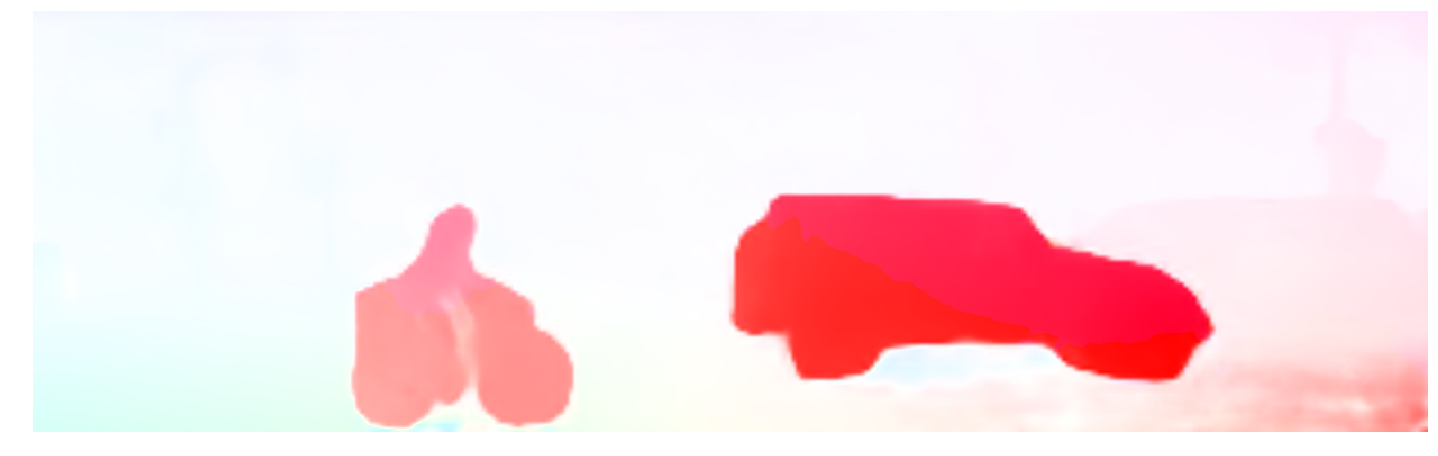

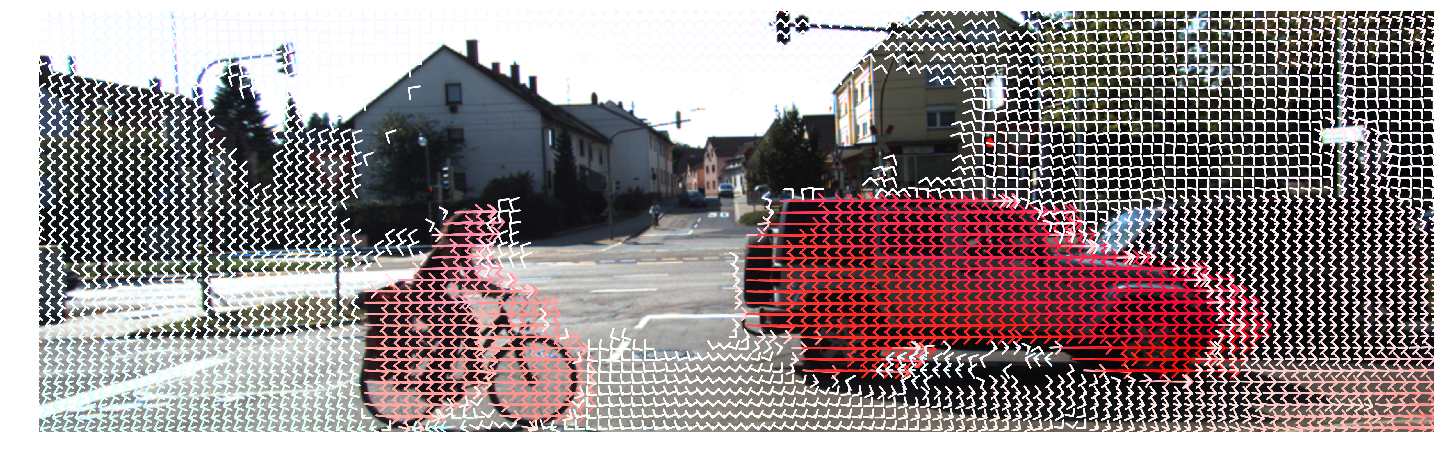

In [8]:
plt.figure(figsize=(25,25))
plt.imshow(flow_to_image(flow))
plt.axis('off')
plt.figure(figsize=(25,25))
dispimg = point_vec(img,flow)
plt.imshow(dispimg[:,:,::-1])
plt.axis('off')